<a href="https://colab.research.google.com/github/LucasJFaust/bibliotecas_py/blob/main/Case_Classifica%C3%A7%C3%A3o_CrispDM_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Desafio de Churn: Uma Abordagem Estruturada com CRISP-DM

Novamente vamos trabalhar usando um problema de churn. Faça o desafio usando o CrispDM, a etapa de entendimento das variáveis, entendimento dos dados, descritiva, exploratória, escolha dos modelos de classificação, fazer o tunning sobre os resulktados e qual deles nos implementariamos.

**Etapas do Desafio**

- **Entendimento do Problema de Negócio**: Clarificar o contexto e os objetivos específicos relacionados ao churn. Definir claramente o que é considerado churn no âmbito deste projeto.


- **Entendimento das Variáveis**: Identificar e descrever as variáveis disponíveis no dataset, entendendo seu significado, tipo (categórica, numérica, etc.), e a relação que podem ter com o churn.


- **Entendimento dos Dados**: Avaliar a qualidade dos dados, identificar a presença de valores ausentes ou atípicos, e realizar uma limpeza e pré-processamento inicial para facilitar as análises subsequentes.


- **Análise Descritiva**: Realizar uma análise descritiva básica para obter um panorama geral dos dados, incluindo estatísticas descritivas e distribuições das variáveis.


- **Análise Exploratória**: Aprofundar a análise explorando as relações entre as variáveis e o churn. Utilizar visualizações gráficas e estatísticas para identificar padrões ou tendências que possam sugerir hipóteses.


- **Escolha dos Modelos de Classificação**: Selecionar modelos de classificação adequados para o problema de churn, considerando as características dos dados e o objetivo do negócio.


- **Otimização e Tunning dos Modelos**: Aplicar técnicas de otimização e ajuste fino dos parâmetros dos modelos escolhidos para maximizar a performance.


- **Avaliação e Implementação do Modelo**: Avaliar a performance dos modelos utilizando métricas apropriadas. Decidir qual modelo apresenta o melhor equilíbrio entre precisão e generalização para ser implementado.


**Entrega**

A conclusão do desafio deve incluir a documentação de todas as etapas realizadas, a justificativa para as escolhas feitas, os resultados obtidos, e uma recomendação fundamentada sobre qual modelo de classificação de churn deve ser implementado, acompanhado de um plano de ação para aplicação prática dos insights obtidos.

**Considerações Finais**

Este desafio não apenas testará suas habilidades técnicas em ciência de dados, mas também sua capacidade de traduzir análises complexas em recomendações de negócio acionáveis. Boa sorte!

#1. Entendimento do Negócio
O desafio proposto envolve a análise de churn de clientes, onde o objetivo é prever quais clientes têm maior probabilidade de deixar a empresa. A análise se baseia no método CRISP-DM, um processo iterativo que oferece uma estrutura para conduzir projetos de ciência de dados.

In [ ]:
#Target:

#Churn — Cliente deu churn ou não

#Variáveis numéricas:

#Tenure — Número de meses que o cliente está na base
#MonthlyCharges — A quantia consumida por cliente mensalmente
#TotalCharges — A quantia consumida por cliente total

#Variáveis categóricas:

#CustomerID - Id do cliente
#Gender — M/F
#SeniorCitizen — Se o cidadão é ou não idoso (0,1)
#Partner — Se o cliente é ou não casado
#Dependents — Cliente tem dependentes (Yes, No)
#PhoneService — Cliente tem serviço telefonico (Yes, No)
#MulitpleLines — Se o cliente tem várias linhas ou não (Yes, No, No Phone Service)
#InternetService — Tipo do serviço de internet (DSL, Fiber Optic, None)
#OnlineSecurity — Se o cliente tem segurança online (Yes, No, No Internet Service)
#OnlineBackup — WSe o cliente tem Backup Online (Yes, No, No Internet Service)
#DeviceProtection — Se o cliente tem proteção do dispositivo (Yes, No, No Internet Service)
#TechSupport — Se o cliente tem suporte tecnológico (Yes, No, No Internet Service)
#StreamingTV — Se o cliente tem streaming de TV (Yes, No, No Internet Service)
#StreamingMovies — Se o cliente tem serviço de streaming de filmes (Yes, No, No Internet Service)
#Contract — Termo de contrato do cliente (Monthly, 1-Year, 2-Year)
#PaperlessBilling — Se o cliente tem ou não boleto sem papel (Yes, No)
#PaymentMethod — Método de pagamento do cliente(E-Check, Mailed Check, Bank Transfer (Auto), Credit Card (Auto))

#2. Entendimento dos Dados
Carregamento dos dados e exibição das primeiras linhas para uma inspeção inicial. Isso ajuda a entender a estrutura dos dados e identificar variáveis chave.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**Análise descritiva** para resumo estatístico, contagem de valores ausentes e tipos de dados, respectivamente, facilitando a identificação de necessidades de pré-processamento.

In [2]:
df = pd.read_excel("/content/churn_data.xlsx")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [4]:
df.isna().count()

customerID          7032
gender              7032
SeniorCitizen       7032
Partner             7032
Dependents          7032
tenure              7032
PhoneService        7032
MultipleLines       7032
InternetService     7032
OnlineSecurity      7032
OnlineBackup        7032
DeviceProtection    7032
TechSupport         7032
StreamingTV         7032
StreamingMovies     7032
Contract            7032
PaperlessBilling    7032
PaymentMethod       7032
MonthlyCharges      7032
TotalCharges        7032
Churn               7032
dtype: int64

In [5]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

Visualização da distribuição de churn entre os clientes, importante para entender o balanceamento da variável alvo.

In [6]:
df_agg = df.groupby("Churn")["customerID"].count().reset_index()
df_agg

,Churn,customerID
0,No,5163
1,Yes,1869


<Axes: xlabel='Churn', ylabel='customerID'>

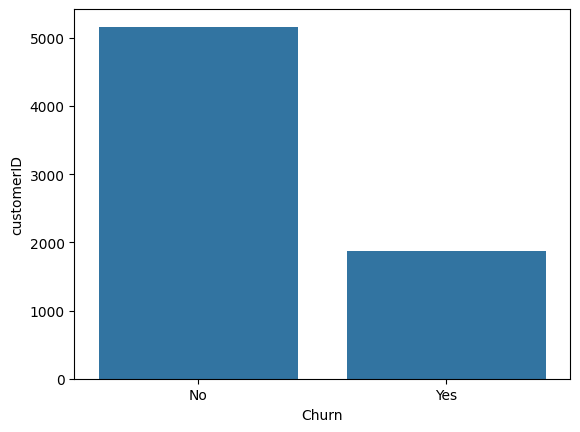

In [7]:
sns.barplot(data = df_agg, x="Churn", y="customerID")

In [8]:
df_payment = df.groupby("PaymentMethod")["customerID"].count().reset_index()
df_payment = pd.DataFrame(df_payment)
df_payment

,PaymentMethod,customerID
0,Bank transfer (automatic),1542
1,Credit card (automatic),1521
2,Electronic check,2365
3,Mailed check,1604


<Axes: xlabel='PaymentMethod', ylabel='customerID'>

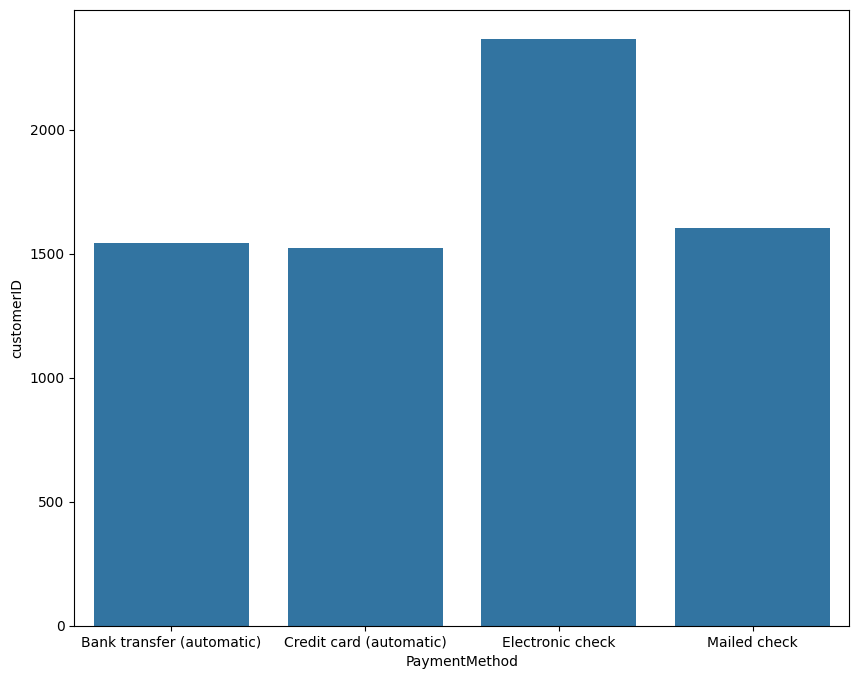

In [9]:
plt.figure(figsize=[10,8])
sns.barplot(data = df_payment, x="PaymentMethod", y="customerID")

In [10]:
df_gender = df.groupby("gender")["customerID"].count().reset_index()
df_gender = pd.DataFrame(df_gender)
df_gender

,gender,customerID
0,Female,3483
1,Male,3549


#3. Preparação dos Dados

Separação das variáveis independentes (X) e da variável alvo (y).

In [11]:
X = df.drop(columns=["customerID", "Churn"], axis = 1)

y = df[["Churn"]]

Codificação da variável alvo. A transformação de variáveis categóricas em numéricas é essencial para modelos de machine learning.

In [12]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

le.fit(y.Churn)
y.Churn = le.transform(y.Churn)

<ipython-input-12-52f7f71ac66c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.Churn = le.transform(y.Churn)


Conversão de variáveis categóricas em dummies para inclusão no modelo de machine learning.

In [13]:
X = pd.get_dummies(X)

Normalização das variáveis independentes para garantir que o modelo não seja enviesado por variáveis com escalas diferentes.

In [14]:
from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler()

X = pd.DataFrame(mm.fit_transform(X))

#4. Modelagem
Divisão do conjunto de dados em treino e teste, fundamental para avaliar a capacidade de generalização do modelo.

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

Treinamento de um modelo de regressão logística. A regressão logística é uma técnica estatística que modela a probabilidade de uma variável binária.

In [17]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
lr = model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [18]:
lr.predict(X_test)

array([1, 0, 0, ..., 0, 1, 0])

In [19]:
X_test.assign(churn = y_test).assign(label = lr.predict(X_test))

,0,1,2,3,4,5,6,7,8,9,...,37,38,39,40,41,42,43,44,churn,label
353,0.0,0.042254,0.662189,0.040745,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1,1
609,0.0,0.112676,0.116418,0.026558,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,0
6025,0.0,0.084507,0.019900,0.012734,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,0
2359,0.0,0.183099,0.640796,0.134572,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,1
6601,0.0,0.056338,0.615423,0.043821,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2492,0.0,0.042254,0.013433,0.008614,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,0
3968,1.0,0.267606,0.672139,0.197173,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1,1
6323,0.0,0.943662,0.865672,0.825565,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0,0
799,0.0,0.126761,0.798507,0.119946,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,1


In [33]:
!pip install scikit-learn==1.0.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.5/26.5 MB 45.8 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 0.21.0 requires scikit-learn>=1.2.2, but you have scikit-learn 1.0.2 which is incompatible.


Visualização da matriz de confusão, que oferece insights sobre o desempenho do modelo, comparando previsões e valores reais.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


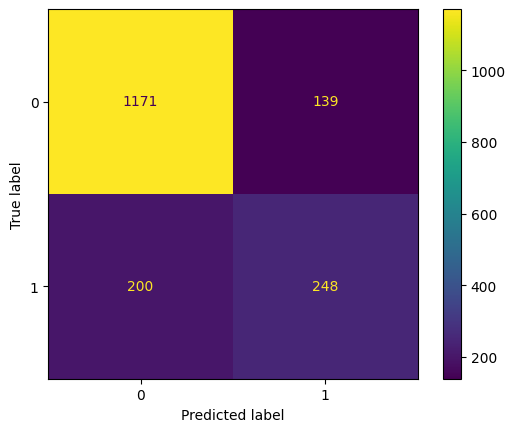

In [20]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

plot_confusion_matrix(lr, X_test, y_test, values_format='d')

In [22]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

Cálculo de métricas de desempenho, como acurácia, precisão, recall, F1-Score e ROC-AUC, para avaliar o modelo sob diferentes aspectos.

In [23]:
print(f"Acurácia (Treino): {accuracy_score(y_train, lr.predict(X_train))}")
print(f"Acurácia (Teste): {accuracy_score(y_test, lr.predict(X_test))}")
print("====================================")
print(f"Acurácia Balanceada (Treino): {balanced_accuracy_score(y_train, lr.predict(X_train))}")
print(f"Acurácia Balanceada (Teste): {balanced_accuracy_score(y_test, lr.predict(X_test))}")
print("====================================")
print(f"Precision (Treino): {precision_score(y_train, lr.predict(X_train))}")
print(f"Precision (Teste): {precision_score(y_test, lr.predict(X_test))}")
print("====================================")
print(f"Recall (Treino): {recall_score(y_train, lr.predict(X_train))}")
print(f"Recall (Teste): {recall_score(y_test, lr.predict(X_test))}")
print("====================================")
print(f"F1-Score (Treino): {f1_score(y_train, lr.predict(X_train))}")
print(f"F1-Score (Teste): {f1_score(y_test, lr.predict(X_test))}")
print("====================================")
print(f"ROCAUC (Treino): {roc_auc_score(y_train, lr.predict_proba(X_train)[:,1])}")
print(f"ROCAUC (Teste): {roc_auc_score(y_test, lr.predict_proba(X_test)[:,1])}")

Acurácia (Treino): 0.801668562760713
Acurácia (Teste): 0.8071672354948806
Acurácia Balanceada (Treino): 0.7223423516555731
Acurácia Balanceada (Teste): 0.7237322791712104
Precision (Treino): 0.6576955424726662
Precision (Teste): 0.6408268733850129
Recall (Treino): 0.5503166783954961
Recall (Teste): 0.5535714285714286
F1-Score (Treino): 0.5992337164750958
F1-Score (Teste): 0.5940119760479042
ROCAUC (Treino): 0.849063845805557
ROCAUC (Teste): 0.8399153148854963


#5. Avaliação
Nesta etapa, as métricas calculadas anteriormente são interpretadas para determinar a eficácia do modelo. A matriz de confusão, por exemplo, ajuda a identificar falsos positivos e falsos negativos.

#6. Ajuste de Modelo (Tuning)
Treinamento de um modelo de floresta aleatória, seguido pela aplicação de GridSearchCV para otimizar hiperparâmetros. Este passo visa melhorar o desempenho do modelo através da escolha de parâmetros ideais.

In [24]:
from sklearn.ensemble import RandomForestClassifier

rf =  RandomForestClassifier()

In [25]:
rf.fit(X_train, y_train)

<ipython-input-25-168a6fc83696>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


RandomForestClassifier()

In [26]:
rf.predict(X_test)

array([1, 0, 0, ..., 0, 1, 0])

In [27]:
X_test.assign(churn = y_test).assign(label = rf.predict(X_test))

,0,1,2,3,4,5,6,7,8,9,...,37,38,39,40,41,42,43,44,churn,label
353,0.0,0.042254,0.662189,0.040745,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1,1
609,0.0,0.112676,0.116418,0.026558,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,0
6025,0.0,0.084507,0.019900,0.012734,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,0
2359,0.0,0.183099,0.640796,0.134572,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,1
6601,0.0,0.056338,0.615423,0.043821,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2492,0.0,0.042254,0.013433,0.008614,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,0
3968,1.0,0.267606,0.672139,0.197173,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1,1
6323,0.0,0.943662,0.865672,0.825565,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0,0
799,0.0,0.126761,0.798507,0.119946,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,1


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


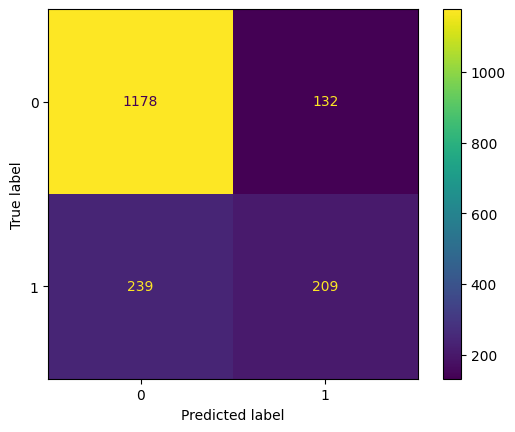

In [28]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(rf, X_test, y_test, values_format='d')

In [29]:
print(f"Acurácia (Treino): {accuracy_score(y_train, rf.predict(X_train))}")
print(f"Acurácia (Teste): {accuracy_score(y_test, rf.predict(X_test))}")
print("====================================")
print(f"Acurácia Balanceada (Treino): {balanced_accuracy_score(y_train, rf.predict(X_train))}")
print(f"Acurácia Balanceada (Teste): {balanced_accuracy_score(y_test, rf.predict(X_test))}")
print("====================================")
print(f"Precision (Treino): {precision_score(y_train, rf.predict(X_train))}")
print(f"Precision (Teste): {precision_score(y_test, rf.predict(X_test))}")
print("====================================")
print(f"Recall (Treino): {recall_score(y_train, rf.predict(X_train))}")
print(f"Recall (Teste): {recall_score(y_test, rf.predict(X_test))}")
print("====================================")
print(f"F1-Score (Treino): {f1_score(y_train, rf.predict(X_train))}")
print(f"F1-Score (Teste): {f1_score(y_test, rf.predict(X_test))}")
print("====================================")
print(f"ROCAUC (Treino): {roc_auc_score(y_train, rf.predict_proba(X_train)[:,1])}")
print(f"ROCAUC (Teste): {roc_auc_score(y_test, rf.predict_proba(X_test)[:,1])}")

Acurácia (Treino): 0.9977246871444824
Acurácia (Teste): 0.7889647326507395
Acurácia Balanceada (Treino): 0.9971101966297317
Acurácia Balanceada (Teste): 0.6828772491821156
Precision (Treino): 0.995777621393385
Precision (Teste): 0.6129032258064516
Recall (Treino): 0.995777621393385
Recall (Teste): 0.46651785714285715
F1-Score (Treino): 0.995777621393385
F1-Score (Teste): 0.5297845373891003
ROCAUC (Treino): 0.9999372615688481
ROCAUC (Teste): 0.8159240389858233


In [30]:
# Importamos GridSearchCV
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'n_estimators': [100, 300, 500]}

grid_search = GridSearchCV(rf, parameters, scoring='accuracy', cv=5, n_jobs=-1)

In [31]:
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'n_estimators': [100, 300, 500]},
             scoring='accuracy')

In [33]:
grid_search.best_estimator_.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 300,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [34]:
from sklearn.ensemble import RandomForestClassifier

rf_tunned =  RandomForestClassifier(bootstrap = True, ccp_alpha = 0.0,
                                     class_weight = None, criterion= 'gini',
                                     max_depth = 10, max_features= 'auto',
                                     max_leaf_nodes = None,
                                     max_samples = None,
                                     min_impurity_decrease = 0.0,
                                     min_samples_leaf = 1,
                                     min_samples_split = 2,
                                     min_weight_fraction_leaf = 0.0,
                                     n_estimators = 500, n_jobs = None,
                                     oob_score = False, random_state = None,
                                     verbose = 0, warm_start = False)
rf_tunned

RandomForestClassifier(max_depth=10, n_estimators=500)

In [35]:
rf_tunned.fit(X_train, y_train)

<ipython-input-35-23d38da6abb7>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_tunned.fit(X_train, y_train)


RandomForestClassifier(max_depth=10, n_estimators=500)

In [36]:
rf_tunned.predict(X_test)

array([1, 0, 0, ..., 0, 1, 0])

In [37]:
X_test.assign(churn = y_test).assign(label = rf_tunned.predict(X_test))

,0,1,2,3,4,5,6,7,8,9,...,37,38,39,40,41,42,43,44,churn,label
353,0.0,0.042254,0.662189,0.040745,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1,1
609,0.0,0.112676,0.116418,0.026558,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,0
6025,0.0,0.084507,0.019900,0.012734,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,0
2359,0.0,0.183099,0.640796,0.134572,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,1
6601,0.0,0.056338,0.615423,0.043821,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2492,0.0,0.042254,0.013433,0.008614,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,0
3968,1.0,0.267606,0.672139,0.197173,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1,1
6323,0.0,0.943662,0.865672,0.825565,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0,0
799,0.0,0.126761,0.798507,0.119946,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,1


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


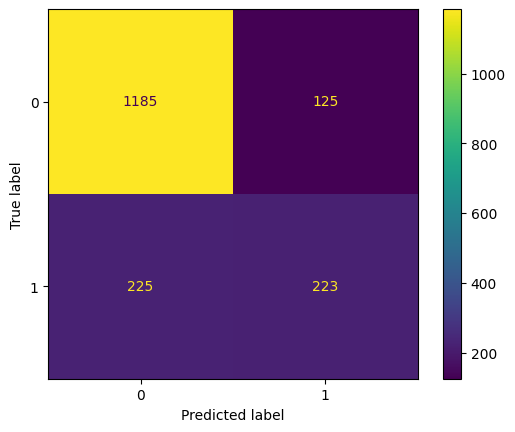

In [39]:
plot_confusion_matrix(rf_tunned, X_test, y_test, values_format='d')

In [38]:
print(f"Acurácia (Treino): {accuracy_score(y_train, rf_tunned.predict(X_train))}")
print(f"Acurácia (Teste): {accuracy_score(y_test, rf_tunned.predict(X_test))}")
print("====================================")
print(f"Acurácia Balanceada (Treino): {balanced_accuracy_score(y_train, rf_tunned.predict(X_train))}")
print(f"Acurácia Balanceada (Teste): {balanced_accuracy_score(y_test, rf_tunned.predict(X_test))}")
print("====================================")
print(f"Precision (Treino): {precision_score(y_train, rf_tunned.predict(X_train))}")
print(f"Precision (Teste): {precision_score(y_test, rf_tunned.predict(X_test))}")
print("====================================")
print(f"Recall (Treino): {recall_score(y_train, rf_tunned.predict(X_train))}")
print(f"Recall (Teste): {recall_score(y_test, rf_tunned.predict(X_test))}")
print("====================================")
print(f"F1-Score (Treino): {f1_score(y_train, rf_tunned.predict(X_train))}")
print(f"F1-Score (Teste): {f1_score(y_test, rf_tunned.predict(X_test))}")
print("====================================")
print(f"ROCAUC (Treino): {roc_auc_score(y_train, rf_tunned.predict_proba(X_train)[:,1])}")
print(f"ROCAUC (Teste): {roc_auc_score(y_test, rf_tunned.predict_proba(X_test)[:,1])}")

Acurácia (Treino): 0.8811149032992036
Acurácia (Teste): 0.800910125142207
Acurácia Balanceada (Treino): 0.8304627685309873
Acurácia Balanceada (Teste): 0.7011740049073064
Precision (Treino): 0.8165869218500797
Precision (Teste): 0.6408045977011494
Recall (Treino): 0.7206192821956369
Recall (Teste): 0.49776785714285715
F1-Score (Treino): 0.7656074766355141
F1-Score (Teste): 0.5603015075376884
ROCAUC (Treino): 0.9551927969340542
ROCAUC (Teste): 0.8371677344601962


#7. Implementação
A escolha do modelo para implementação dependerá dos resultados das métricas de desempenho. O modelo com melhor balanceamento entre precisão e recall, por exemplo, pode ser o mais adequado para o problema em questão.


Cada etapa do CRISP-DM foi abordada com ações específicas e técnicas de ciência de dados, desde a análise exploratória até o ajuste fino dos modelos, sempre com o objetivo de entender melhor o comportamento do churn e prever sua ocorrência.





